# <u>Chapter 5: Zeros and Minima</u>

* We often need to solve equations of the form $f(x)=0$, where $f(x)$ is non-linear. <br><br>
    - Examples in physics/chemistry: <br><br>
        * Van der Waals equation of state: <br><br> $$(p+\frac{a}{\nu^2})(\nu-b)=RT\text{, where }\nu=\frac{V}{\text{mole}}$$ <br>
        * Quantum Mechanics of a particle in finite well of width $2a$ and height $V_0$: <br><br>$$k\tan(ka)=[\frac{2mV_0}{\hbar^2}-k^2]^{1/2}$$ <br>
        * Or worse: $\vec{f}(\vec{x})=\vec{0}$ with $n$ non-linear equations and $n$ unknowns. <br><br>
        $$\begin{array}{l}
        f_0(x_0,x_1,\ldots,x_{n-1})= 0 \\
        f_1(x_0,x_1,\ldots,x_{n-1})= 0 \\
        \vdots & \; \\
        f_{n-1}(x_0,x_1,\ldots,x_{n-1})= 0
        \end{array}$$ <br>
* Also we want to solve or find minima of scaler $\phi$: <br><br>
    - $\min\phi(\vec{x})=\min\phi(x_0,x_1,\ldots,x_{n-1})$ <br><br>
* Our test problem: $f(x)=e^{x-\sqrt{x}}-x=0$

Text(1.25, 1.5, '$f(x)=e^{x-\\sqrt{x}}-x$')

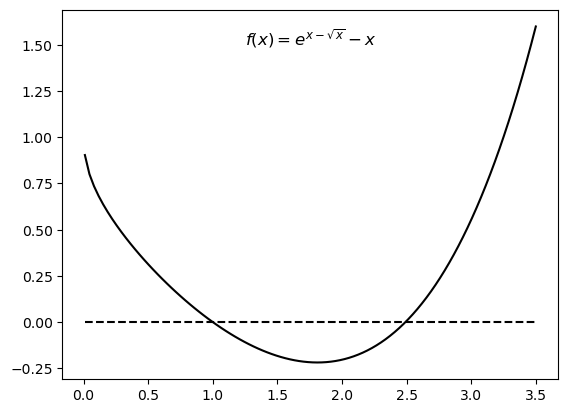

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1e-2,3.5,100)
f = lambda x: np.exp(x-np.sqrt(x))-x
plt.plot(x, f(x), "k")
plt.plot(x, 0*x, "k--")
plt.text(1.25,1.5,r'$f(x)=e^{x-\sqrt{x}}-x$',fontsize='large')

We observe roots around $1$, $2.5$ ($1$ is clearly exact).

<u>Bisection Method:</u>
* Assume you have "bracketed" a root, i.e., found an $x_0$ and $x_1$ such that $f(x_0)$ abd $f(x_1)$ have opposite signs. <br><br>
* So the root must exist in the interval $(x_0, x_1)$. <br><br>
    - Evaluate the midpoint $x_2=\frac{x_0+x_1}{2}$ <br><br>
    - Evaluate $f(x_0)f(x_2)$ <br><br>
        * If $f(x_0)f(x_2)<0$, then a root exist in $(x_0,x_2)$; repeat with $x_2$ in place of $x_1$. <br><br>
        * If $f(x_0)f(x_2)>0$, then a root exist in $(x_2, x_1)$; repeat with $x_2$ in place of $x_0$. <br><br>
    - If we let $x_0\equiv a$ and $x_1\equiv b$, we generate a series of iterations: <br><br> $$x^{(0)}=x^2, x^{(1)}, x^{(2)},\ldots$$ <br> where each new iteration halves the interval. <br><br>
    - So if $x^*$ is a true root, <br> $$\big\lvert x^{(k)}-x^*\big\rvert\le\frac{1}{2}\big\lvert x^{(k-1)}-x^*\big\rvert$$ <br>
    - We choose to terminate iterations when the fractional change is less than a very small number. Call this tolerance $\epsilon$. <br><br> $$\frac{\big\lvert x^{(k)}-x^{(k-1)} \big\rvert}{\big\lvert x^{(k)} \big\rvert}\le\epsilon$$
> <b>(Excerpt) Code 5.2:</b><code>bisection.py</code>

In [2]:
from math import exp, sqrt

def f(x):
    return exp(x - sqrt(x)) - x

def bisection(f,x0,x1,kmax=200,tol=1.e-8):
    f0 = f(x0)
    for k in range(1,kmax):
        x2 = (x0+x1)/2
        f2 = f(x2)
        
        if f0*f2 < 0:
            x1 = x2
        else:
            x0, f0 = x2, f2
        
        x2new = (x0+x1)/2
        xdiff = abs(x2new-x2)
        rowf = "{0:2d} {1:1.16f} {2:1.16f} {3:1.16f}"
        print(rowf.format(k,x2new,xdiff,abs(f(x2new))))
        
        if abs(xdiff/x2new) < tol:
            break
            
    else:
        x2new = None
        
    return x2new

if __name__ == "__main__":
    root = bisection(f,0.,1.5)
    print(root); print("")
    root = bisection(f,1.5,3.)
    print(root)

 1 1.1250000000000000 0.3750000000000000 0.0585452513912128
 2 0.9375000000000000 0.1875000000000000 0.0322220096468296
 3 1.0312500000000000 0.0937500000000000 0.0153801917893579
 4 0.9843750000000000 0.0468750000000000 0.0078734577169989
 5 1.0078125000000000 0.0234375000000000 0.0038909811511951
 6 0.9960937500000000 0.0117187500000000 0.0019569384633997
 7 1.0019531250000000 0.0058593750000000 0.0009756086699708
 8 0.9990234375000000 0.0029296875000000 0.0004885196492074
 9 1.0004882812500000 0.0014648437500000 0.0002440810179281
10 0.9997558593750000 0.0007324218750000 0.0001220852133581
11 1.0001220703125000 0.0003662109375000 0.0000610314309217
12 0.9999389648437500 0.0001831054687500 0.0000305185094428
13 1.0000305175781250 0.0000915527343750 0.0000152585562312
14 0.9999847412109375 0.0000457763671875 0.0000076294527388
15 1.0000076293945312 0.0000228881835938 0.0000038146827137
16 0.9999961853027344 0.0000114440917969 0.0000019073522708
17 1.0000019073486328 0.0000057220458984

However, this method doesn't generalize well to higher dimensional problems

<u>Newton's Method:</u>
* Need $f(x)$ and $f'(x)$. <br><br>
* Let $x^{(k-1)}$ be our last iteration (or our first guess). <br><br>
    - Taylor expand $f(x)$ around this point: <br><br>
    $$f(x)=f\big(x^{(k-1)}\big)+\big(x-x^{(k-1)}\big)f'\big(x^{(k-1)}\big)+\frac{1}{2}\big(x-x^{(k-1)}\big)^2f''\big(\xi\big)$$ <br>
    where $\xi$ is a point between $x$ and $x^{(k-1)}$. <br><br>
* Take $x=x^*$, so $f(x^*)=0$. <br><br>
    - If $f(x)$ is linear (it isn't, but if it was), <br><br>
    $$\begin{array}{c}
    f(x^*)=0 \\
    \; \\
    f\big(x^{(k-1)}\big)+\big(x^*-x^{(k-1)}\big)f'\big(x^{(k-1)}\big)=0 \\
    \; \\
    \Longrightarrow x^*=x^{(k-1)}-\frac{f(x^{(k-1)})}{f'(x^{(k-1)})}
    \end{array}$$
    - So when $f(x)$ is not linear, we will iterate with <br><br> $$x^{(k)}=x^{(k-1)}-\frac{f(x^{(k-1)})}{f'(x^{(k-1)})}$$ <br>
    where $k=1,2,\ldots$ <br><br>
* We can show from our earlier equation that when $x=x^*$ and keeping the $f''(\xi)$ term that (through a lot of algebra), <br><br> $$x^{(k)}-x^*=c(x^{(k-1)}-x^*)^2$$ <br> where $c$ depends on $f''(\xi)$ and $f'(x^{(k-1)})$. <br><br>
* Newton's Method is quadratically convergent than the bisection method. <br><br>
* Geometric interpretation: <br><br>
    - Approximate $f(x)$ with a tangent at $\big(x^{(k-1)},f(x^{(k-1)})\big)$. <br><br>
    - Get $x^{(k)}$ by the point where the tangent line crosses the x-axis. <br><br>
* Condition number:
$$x_{est.}-x_{true}\approx\frac{1}{f'(x_{true})}\big(f(x_{est.})-f(x_{true})\big)$$
where $\kappa=\frac{1}{f'(x)}$, the condition number. <br><br>
    - When $f'(x)$ is large, $\kappa$ is small and so the approximation should proceed well. <br><br>
    - Likewise, when $f'(x)$ is small, $\kappa$ is large and so we may have some trouble.

<u>Secant Method:</u>
* Modification to Newton's Method algorithm estimate $f'(x)$ a la finite difference. <br><br>
$$x^{(k)}=x^{(k-1)}-\frac{f(x^{(k-1)})}{f'(x^{(k-1)})}\text{ for }k=1,2,\ldots$$ <br>
$$f'(x^{(k-1)})\approx\frac{f(x^{(k-1)}-f(x^{(k-2)}))}{x^{(k-1)}-x^{(k-2)}}\text{ for }k=2,3,\ldots$$ <br>
like a finite difference but spacing is not constant. <br><br>
* Geometric Interpretation: <br><br>
    - Draw a straight line between $x^k$, $y^k$ and $x^{k-1}$, $y^{k-1}$ and find the x-intercept. <br><br>
    - For points $(x_0,y_0)$ and $(x_1,y_1)$, <br><br>
    $$y-y_0=\frac{y_1-y_0}{x_1-x_0}(x-x_0)$$
        * set $y=0$. <br><br>
        * solve for $x\equiv x^{k+1}$ by letting
        $$\begin{array}{}
        x_0=x^{k-1} & x_1=x^k \\
        y_0=y^{k-1} & y_1=y^k
        \end{array}$$
><b>(Excerpt) Code 5.3:</b><code>secant.py</code>

In [3]:
def secant(f,x0,x1,kmax=200,tol=1.e-8):
    f0 = f(x0)
    for k in range(1,kmax):
        f1 = f(x1)
        ratio = (x1 - x0)/(f1 - f0)
        x2 = x1 - f1*ratio
        
        xdiff = abs(x2-x1)
        x0, x1 = x1, x2
        f0 = f1
        
        rowf = "{0:2d} {1:1.16f} {2:1.16f} {3:1.16f}"
        print(rowf.format(k,x2,xdiff,abs(f(x2))))
        
        if abs(xdiff/x2) < tol:
            break
    
    else:
        x2 = None
        
    return x2

if __name__ == "__main__":
    root = secant(f,0.,1.7); print(root); print("")
    root = secant(f,2.,2.1); print(root)

 1 1.4004521854971097 0.2995478145028903 0.1580519765211532
 2 0.5526242043685871 0.8478279811285226 0.2737043845137117
 3 1.0900899065346898 0.5374657021661028 0.0429985337663841
 4 1.0171185639642890 0.0729713425704008 0.0084859132802808
 5 0.9991764756419195 0.0179420883223695 0.0004119317155123
 6 1.0000071166820816 0.0008306410401622 0.0000035583283791
 7 1.0000000029289857 0.0000071137530959 0.0000000014644927
 8 0.9999999999999898 0.0000000029289959 0.0000000000000051
0.9999999999999898

 1 2.9792935568396453 0.8792935568396452 0.5223433070698373
 2 2.3279525096516824 0.6513410471879628 0.0975332367096038
 3 2.4304364658064559 0.1024839561547735 0.0400602911601338
 4 2.5018707221082970 0.0714342563018411 0.0077720681470095
 5 2.4902636862846230 0.0116070358236740 0.0004528144783174
 6 2.4909027025612960 0.0006390162766730 0.0000046418045581
 7 2.4909093209671904 0.0000066184058944 0.0000000028219960
 8 2.4909093169459600 0.0000000040212305 0.0000000000000178
2.49090931694596


<u>Other methods</u>
* Ridders: bracketing, superlinear convergeance. <br><br>
* Fixed point: non-bracketing, simple, may not converge. <br><br>
* Look at text examples for details

<u>Systems of non-linear equations:</u>
* $n$ simultaneous non-linear equations with $n$ unknowns. <br><br>
    - $\vec{f}(\vec{x})=\vec{0}$ <br><br>
    - $\vec{f}$ has $n$ functions. <br><br>
    - $\vec{x}$ has $n$ components. <br><br>
    $\underline{\mathcal{Ex:}} \; n=2$
    $$f_0(x_0,x_1)=x_0^2-2x_0+x_1^4-2x_1^2+x_1=0$$ <br>
    $$f_1(x_0,x_1)=x_0^2+x_0+2x_1^3-2x_1^2-\frac{3}{2}x_1-\frac{1}{20}=0$$
unknowns are $x_0,x_1$ <br><br>
* We will generallize Newton's method and iterate over vectors $\vec{x}^{\;(k)}$ <br><br>
    - First, consider a single function component $f_i$ <br><br>
        * We Taylor expand around iterate $\vec{x}^{\;(k-1)}$ <br><br>
        $$\begin{array}{}
        f_i\left(\vec{x}\right)=
        f_i\left(\vec{x}^{\;(k-1)}\right)+
        \left(\nabla f_i\left(\vec{x}^{\;(k-1)}\right)\right)^T\left(\vec{x}-\vec{x}^{\;(k-1)}\right)+
        \mathcal{O}\left(\left\|\vec{x}-\vec{x}^{\;(k-1)}\right\|^2\right) & 
        i=0,1,\ldots,n-1
        \end{array}$$

$$\left[\nabla f_i\left(\vec{x}^{\;(k-1)}\right)\right]^T\left(\vec{x}-\vec{x}^{\;(k-1)}\right)=\sum_{j=0}^{n-1}\frac{\partial f_i}{\partial x_j}\bigg\rvert_{x_j^{\;(k-1)}}\left(x_j-x_j^{\;(k-1)}\right)$$

$$\mathcal{J}_f(\vec{x}^{\;(k-1)})$$
$$\left\|{x}\right\|$$